### Merge Sort

In [1]:
# This modified code was obtained from https://www.geeksforgeeks.org/python/python-program-for-merge-sort/

def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m

    # create temp arrays
    L = [0] * (n1)
    R = [0] * (n2)

    # Copy data to temp arrays L[] and R[]
    for i in range(0, n1):
        L[i] = arr[l + i]

    for j in range(0, n2):
        R[j] = arr[m + 1 + j]

    # Merge the temp arrays back into arr[l..r]
    i = 0     # Initial index of first subarray
    j = 0     # Initial index of second subarray
    k = l     # Initial index of merged subarray

    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    # Copy the remaining elements of L[], if there
    # are any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    # Copy the remaining elements of R[], if there
    # are any
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

# l is for left index and r is right index of the
# sub-array of arr to be sorted


def mergeSort(arr, l, r):
    if l < r:

        # Same as (l+r)//2, but avoids overflow for
        # large l and h
        m = l+(r-l)//2

        # Sort first and second halves
        mergeSort(arr, l, m)
        mergeSort(arr, m+1, r)
        merge(arr, l, m, r)

### Insertion Sort

In [2]:
# This code was obtained from https://www.geeksforgeeks.org/dsa/insertion-sort-algorithm/

def insertionSort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1

        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

### Hybrid Sort

In [3]:
def hybridSort(arr, k):
    if len(arr) < k:
        insertionSort(arr)
    else:
        mergeSort(arr, 0, len(arr)-1)

## Runtime Tests

In [4]:
import timeit
import random
random.seed(42)

n_list = [n for n in range(201)]
merge_time = []
insertion_time = []
hybrid_time_75 = []
hybrid_time_100 = []
hybrid_time_125 = []
hybrid_time_150 = []
hybrid_time_175 = []

for n in n_list:
    
    temp1 = 0
    temp2 = 0
    temp3 = 0
    temp4 = 0
    temp5 = 0
    temp6 = 0
    temp7 = 0
    
    for i in range(2000):
        data1 = [random.randint(0, 100000) for _ in range(n)]
        data2 = data1.copy()
        data3 = data1.copy()
        data4 = data1.copy()
        data5 = data1.copy()
        data6 = data1.copy()
        data7 = data1.copy()
        data_length = len(data1)
    
        right = len(data1) - 1
        start_time = timeit.default_timer()
        mergeSort(data1, 0, right)
        end_time = timeit.default_timer()
        temp1 += end_time - start_time
    
        start_time = timeit.default_timer()
        insertionSort(data2)
        end_time = timeit.default_timer()
        temp2 += end_time - start_time
        
        start_time = timeit.default_timer()
        hybridSort(data3, 75)
        end_time = timeit.default_timer()
        temp3 += end_time - start_time
        
        start_time = timeit.default_timer()
        hybridSort(data4, 100)
        end_time = timeit.default_timer()
        temp4 += end_time - start_time
        
        start_time = timeit.default_timer()
        hybridSort(data5, 125)
        end_time = timeit.default_timer()
        temp5 += end_time - start_time
        
        start_time = timeit.default_timer()
        hybridSort(data6, 150)
        end_time = timeit.default_timer()
        temp6 += end_time - start_time
        
        start_time = timeit.default_timer()
        hybridSort(data7, 175)
        end_time = timeit.default_timer()
        temp7 += end_time - start_time
        
        
    merge_time.append(temp1 / 2000)
    insertion_time.append(temp2 / 2000)
    hybrid_time_75.append(temp3 / 2000)
    hybrid_time_100.append(temp4 / 2000)
    hybrid_time_125.append(temp5 / 2000)
    hybrid_time_150.append(temp6 / 2000)
    hybrid_time_175.append(temp7 / 2000)

In [5]:
crossover_indices = [i for i in range(len(n_list)) if insertion_time[i] > merge_time[i]]
crossover_indices[:5]

[0, 1, 126, 127, 128]

In [6]:
print('k = 75, total time = ', sum(hybrid_time_75) / 201)
print('k = 100, total time = ', sum(hybrid_time_100) / 201)
print('k = 125, total time = ', sum(hybrid_time_125) / 201)
print('k = 150, total time = ', sum(hybrid_time_150) / 201)
print('k = 175, total time = ', sum(hybrid_time_175) / 201)

k = 75, total time =  0.0001346403047933582
k = 100, total time =  0.000130580067972824
k = 125, total time =  0.00012878879659174392
k = 150, total time =  0.00013057813446259867
k = 175, total time =  0.00013768789461878747


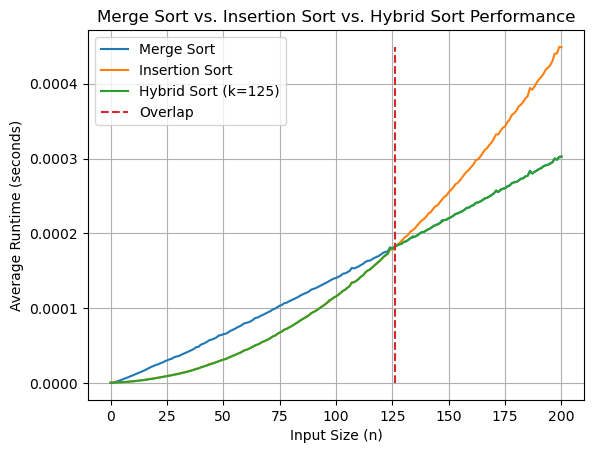

In [7]:
import matplotlib.pyplot as plt

plt.plot(n_list, merge_time, label = "Merge Sort")
plt.plot(n_list, insertion_time, label = "Insertion Sort")
plt.plot(n_list, hybrid_time_125, label = "Hybrid Sort (k=125)")
plt.plot([crossover_indices[2], crossover_indices[2]], [0, max([max(merge_time), max(insertion_time)])],
        linestyle = '--', label = "Overlap")
plt.xlabel("Input Size (n)")
plt.ylabel("Average Runtime (seconds)")
plt.title("Merge Sort vs. Insertion Sort vs. Hybrid Sort Performance")
plt.legend()
plt.grid(True)
plt.show()